In [41]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
!pip install hvplot
import hvplot.pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 4.1 MB/s eta 0:00:00


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/drive/My Drive/crypto_market_data.csv", index_col="coin_id")


# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [11]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [14]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(market_data_df)


In [15]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)


# Set the coinid column as index
scaled_df.index = market_data_df.index


# Display sample data
scaled_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    inertia.append(km.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow



,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


Text(0.5, 1.0, 'Elbow Curve')

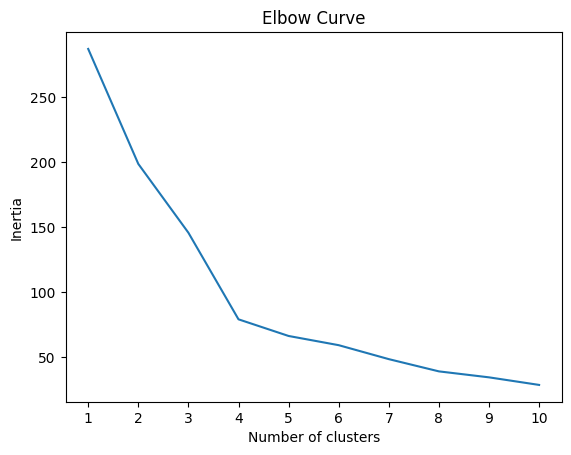

In [17]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** Based on the elbow method, the best value for k should be 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [18]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)



In [19]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)


KMeans(n_clusters=4, random_state=0)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(scaled_df)


# View the resulting array of cluster values.
predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [22]:
# Create a copy of the DataFrame
market_data = market_data_df.copy()


In [25]:
# Add a new column to the DataFrame with the predicted clusters
market_data['Predicted Class'] = model.labels_


# Display sample data
market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted Class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

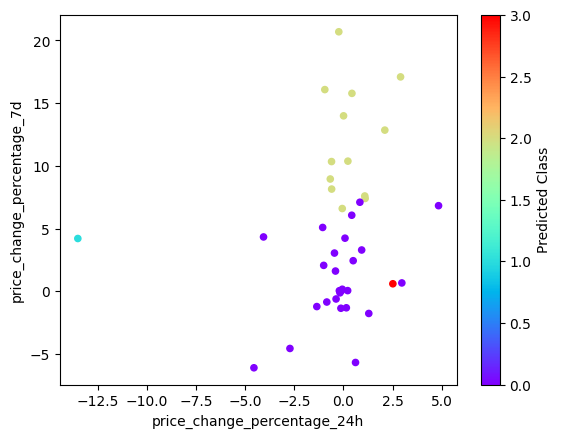

In [26]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="Predicted Class", colormap="rainbow")


### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [28]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)


# View the first five rows of the DataFrame.
pca_data[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [29]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** PC1 explains ~37% of the variance, PC2 explains ~35% of the variance, and PC3 explains ~18% of the variance. Coming to a total of 90% explained variance.

In [30]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you


# Creating a DataFrame with the PCA data
df_crypto_pca = pd.DataFrame(
    data=pca_data, columns=["PC1", "PC2", "PC3"]
)


# Copy the crypto names from the original data
df_crypto_pca["coin_id"] = market_data_df.index


# Set the coinid column as index
df_crypto_pca.set_index("coin_id", inplace=True)


# Display sample data
df_crypto_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


Text(0.5, 1.0, 'Elbow Curve')

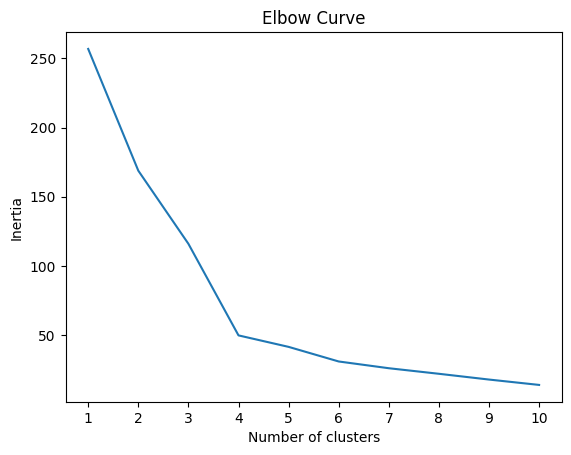

In [32]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k remains as 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This does not differ from the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)


In [34]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)


KMeans(n_clusters=4, random_state=0)

In [35]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(df_crypto_pca)


# Print the resulting array of cluster values.
predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [37]:
# Create a copy of the DataFrame with the PCA data
clustered_df = df_crypto_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_df['Predicted Class'] = model.labels_

# Display sample data
clustered_df.head(10)


,PC1,PC2,PC3,Predicted Class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [44]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"
clustered_df.hvplot.scatter(x="PC1", y="PC2", by="Predicted Class")

:NdOverlay   [Predicted Class]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Determine the Weights of Each Feature on each Principal Component
# Use the columns from the PCA transformed DataFrame as the index.
# The cluster_centers_ are based on the principal components, not the original features.
weights = pd.DataFrame(
    model.cluster_centers_,
    columns=[f"PC{i+1}" for i in range(model.cluster_centers_.shape[1])],  # Use PC1, PC2, PC3 as columns
    index=["Class 0", "Class 1", "Class 2", "Class 3"]
)

# Display sample data
weights

,PC1,PC2,PC3
Class 0,-0.240076,-0.534028,-0.595750
Class 1,8.089018,-3.896891,2.301382
Class 2,-0.510727,0.847226,1.167315
Class 3,4.792395,6.767679,-1.986985


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:** PC1 is most positively influenced by Class 1 and negatively influenced by Class 2. PC2 is most positively influenced by Class 3 and negatively influenced by Class 1. PC3 is most positively influenced by Class 1 and negatively influenced by Class 3
    